<h2> <font color='blue'> Day 2 afternoon Challenge

<h3><font color=blue> The goal today is to compare seasonal timeseries of the lidar 18m wind data. A suggestion of steps are shown below, but this code can be written many different ways (and more efficiently than suggested below). If you have an idea of how to proceed, ignore the comments! The comments should be used if you have no idea where to get started.<br/><br/>The challenge is to: 
    <br/> 1. Make a plot or plots that compare(s) data from each season in 2020. The timesteps should be daily-averaged windspeed.
    <br/> <font color='blue'>2. Write a description comparing the seasonal wind trends
    <br/> <font color='red'>3. Produce the same comparison as 1 but this time, using both 2019 and 2020 dates to calculate the daily-averaged windspeed.
    

<h1><font color='blue'> 1. 

In [1]:
#Load in libraries / packages you might need here
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
from numpy import savetxt
import pandas as pd
import matplotlib.colors
from matplotlib import cm

In [2]:
#Load in the exact same wind data we used previously (feel free to copy and paste the code from the
#morning session).

#Uploading data-don't need to worry about how to write any of this code yet!
lidar_winds = pd.read_csv('lidar_winds_short.csv')
lidar_winds['timestamp'] = pd.to_datetime(lidar_winds['timestamp'])

# Separate our year, month, day, time
lidar_winds['Year'] = pd.DatetimeIndex(lidar_winds['timestamp']).year
lidar_winds['Month'] = pd.DatetimeIndex(lidar_winds['timestamp']).month
lidar_winds['Day'] = pd.DatetimeIndex(lidar_winds['timestamp']).day
lidar_winds['Time'] = pd.DatetimeIndex(lidar_winds['timestamp']).time

# Create numpy arrays of values from dataarray
wind18m = np.asarray(lidar_winds['wspd18m'])
year = np.asarray(lidar_winds['Year'])
month = np.asarray(lidar_winds['Month'])
day = np.asarray(lidar_winds['Day'])
time = np.asarray(lidar_winds['Time'])

<h3> Retrieve arrays containing daily averages of wind speed for all four seasons in 2020

In [3]:
#Using a 'for' loop (or using separate for loops for each season if you prefer), create numpy arrays for 
#each season containing wind speed data for that season

#We will define the seasons here as:
#  Winter: Dec, Jan, Feb
#  Spring: March, Apr, May
#  Summer: June, July, Aug
#  Fall: Sept, Oct, Nov

#Let the variable num_times represent the number of times we have in our data 
num_times = len(wind18m)

#Initialize empty numpy arrays to store the wind speed for all times in each season
wind_winter_2020 = np.array([])
wind_spring_2020 = np.array([])
wind_summer_2020 = np.array([])
wind_fall_2020 = np.array([])

#For a range of consecutive values from zero to the number of values in the wind array, do the following
for i in range(num_times):
    
    #Save the information we need for the next steps of the loop into variables
    year_i = year[i]
    month_i = month[i]
    wdsp = wind18m[i]
    
    #If the year is 2020 then do the following
    if(year_i ==2020):
        
        #If the month is in the winter, then add the wind speed to the winter wind array
        if (month_i == 12 or month_i == 1 or month_i == 2):
            wind_winter_2020 = np.append(wind_winter_2020,wdsp)
        
        #If the month is in the spring, then add the wind speed to the spring wind array
        elif (month_i == 3 or month_i == 4 or month_i == 5):
            wind_spring_2020 = np.append(wind_spring_2020,wdsp)
            
        #If the month is in the summer, then add the wind speed to the spring wind array
        elif (month_i == 6 or month_i == 7 or month_i == 8):
            wind_summer_2020 = np.append(wind_summer_2020,wdsp)
            
        #If none of the conditions above are met, then the month must be in Fall, and we 
        #should add the wind speed to the fall wind array
        else:
            wind_fall_2020 = np.append(wind_fall_2020,wdsp)

In [4]:
#Using a 'for' loop or multiple for loops, retrieve the average daily windspeed for each of the seasons

#Initialize new empty numpy arrays to store the daily-averaged wind speed for season
daily_wind_winter_2020 = np.array([])
daily_wind_spring_2020 = np.array([])
daily_wind_summer_2020 = np.array([])
daily_wind_fall_2020 = np.array([])

#Assign to four different variables the number of times in each season of 2020
num_times_winter_2020 = len(wind_winter_2020)
num_times_spring_2020 = len(wind_spring_2020)
num_times_summer_2020 = len(wind_summer_2020)
num_times_fall_2020 = len(wind_fall_2020)

#Since each seasonal array of winds has a different number of days/times, we can use four separate
#for loops to iterate through the wind speeds in each season and calculate the daily averages

#For a range of consecutive values from zero to the total number of daily timesteps in Fall (the number 
#of 10 minutely timesteps divided by 6*24, since there are six 10-minute intervals in an hour, and 24
#hours in a day)
for j in range(int(num_times_winter_2020/(6*24))):
    
    #Make a separate counter k, which counts through all of the 10-minutely winter timesteps in each day
    k=j*6*24
    
    #Calculate the wind speed for this day as the average wind speed across the the k, k+1, k+2,...,k+6*24
    #timesteps of the 10 minute data
    daily_wdsp = np.nanmean(wind_winter_2020[k:k+(6*24)])
    
    #Save the new average of wind speed found for the current day into our new arrays
    daily_wind_winter_2020 = np.append(daily_wind_winter_2020, daily_wdsp)
    
#Repeat the same procedure as above but for spring
for j in range(int(num_times_spring_2020/(6*24))):
    k=j*6*24
    daily_wdsp = np.nanmean(wind_spring_2020[k:k+(6*24)])
    daily_wind_spring_2020 = np.append(daily_wind_spring_2020, daily_wdsp)

#Repeat the same procedure as above but for summer
for j in range(int(num_times_summer_2020/(6*24))):
    k=j*6*24
    daily_wdsp = np.nanmean(wind_summer_2020[k:k+(6*24)])
    daily_wind_summer_2020 = np.append(daily_wind_summer_2020, daily_wdsp)

#Repeat the same procedure as above but for fall
for j in range(int(num_times_fall_2020/(6*24))):
    k=j*6*24
    daily_wdsp = np.nanmean(wind_fall_2020[k:k+(6*24)])
    daily_wind_fall_2020 = np.append(daily_wind_fall_2020, daily_wdsp)

<h2> Plot all of the seasons on one graph

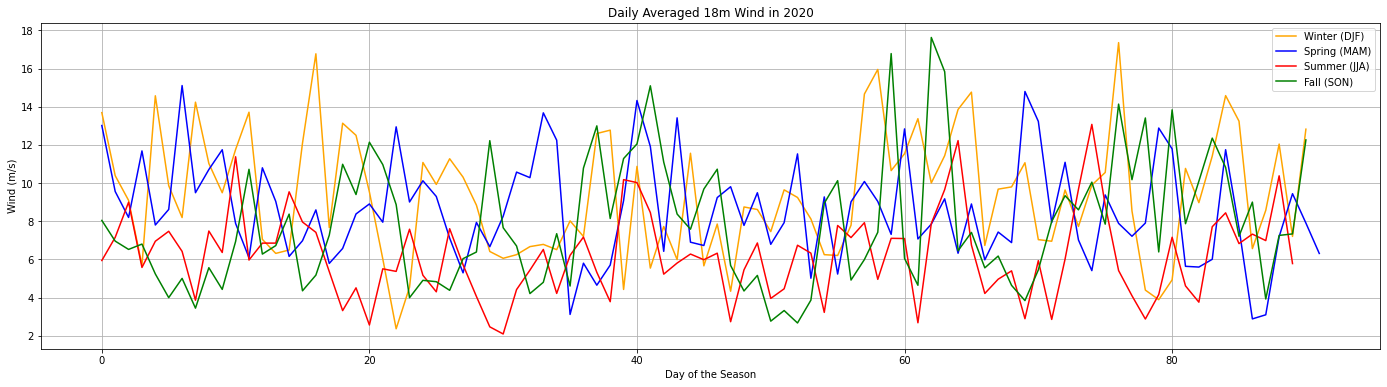

In [5]:
#For each season, make arrays that mark the number of the day of each avarage wind speed
days_winter = np.arange(0,len(daily_wind_winter_2020))
days_spring = np.arange(0,len(daily_wind_spring_2020))
days_summer = np.arange(0,len(daily_wind_summer_2020))
days_fall = np.arange(0,len(daily_wind_fall_2020))

#Plot each of the four seasons as a timeseries on the same plot. 
#Use different colors and add a legend to make it beautiful!

#Create the figure
fig=plt.figure(figsize=(24,6))
#add one subplot to figure
ax= fig.add_subplot(1, 1, 1)

#Name and plot day on the x axis, wind on the y
#wind_winter=daily_wind_winter_2020[:,1].astype('float64')
#wind_spring=daily_wind_spring_2020[:,1].astype('float64')
#wind_summer=daily_wind_summer_2020[:,1].astype('float64')
#wind_fall=daily_wind_fall_2020[:,1].astype('float64')

#plot each season. Make sure to include a label for the legend
plt.plot(days_winter, daily_wind_winter_2020, color='orange', label='Winter (DJF)')
plt.plot(days_spring, daily_wind_spring_2020, color='blue', label='Spring (MAM)')
plt.plot(days_summer, daily_wind_summer_2020, color='red', label='Summer (JJA)')
plt.plot(days_fall, daily_wind_fall_2020, color='green', label='Fall (SON)')


#add grid lines
plt.grid()

#Add title and axis labels
ax.set_title('Daily Averaged 18m Wind in 2020')
ax.set_xlabel('Day of the Season')
ax.set_ylabel('Wind (m/s)')

#Add a legend for each season
plt.legend()


plt.show()

<h1><font color='blue'> 2. 

Write a few sentences of observations you see based on your seasonal winds.

- Winter tends to have higher 18m winds than Summer. 
- The maximum winds occurred in Fall.
- The minimum winds occurred in Summer. 

<h1><font color='red'> 3. 